# Initialization Stability

Here we examine the reproducibility of our initial results that FPR gets worse over time by testing many random seeds and creating boxplots for initial and updated FPR

In [3]:
import copy
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import importlib

import src.models.sklearn
import src.scripts.initialization_stability
import src.utils.data
import src.utils.metrics
import src.utils.update
import src.utils.save

importlib.reload(src.models.sklearn)
importlib.reload(src.scripts.initialization_stability)
importlib.reload(src.utils.data)
importlib.reload(src.utils.metrics)
importlib.reload(src.utils.update)
importlib.reload(src.utils.save)

from src.models.sklearn import lr
from src.scripts.initialization_stability import train_update_loop, boxplot, scatterplot
from src.utils.data import generate_gaussian_dataset, generate_sklearn_make_classification_dataset
from src.utils.metrics import eval_model
from src.utils.update import update_model_feedback
from src.utils.save import create_file_path, save_json, CONFIG_FILE

from sklearn.model_selection import train_test_split
from dotenv import find_dotenv, load_dotenv

from settings import ROOT_DIR
%matplotlib inline

In [15]:
load_dotenv(find_dotenv(), override=True)
results_dir = os.environ.get("INITIALIZATION_STABILITY_RESULTS_DIR")
results_dir = os.path.join(ROOT_DIR, results_dir)

## `sklearn.datasets.make_classification` Data | num_features=2

In [5]:
seeds = 1000

n_train = 10000
n_update = 10000
n_test = 10000

num_features = 2
num_updates = 100

data_fn = generate_sklearn_make_classification_dataset
data_type = "sklearn"

In [6]:
initial_fprs_sklearn, updated_fprs_sklearn = train_update_loop(n_train, n_update, n_test, num_features, num_updates, data_fn, seeds)

In [7]:
fprs_sklearn_boxplot = {"type": (["initial"] * len(initial_fprs_sklearn)) + (["updated"] * len(updated_fprs_sklearn)),
        "fpr": initial_fprs_sklearn + updated_fprs_sklearn}
fprs_sklearn_scatterplot = {"initial_fpr": initial_fprs_sklearn, "updated_fpr": updated_fprs_sklearn}

In [8]:
data_sklearn_boxplot = pd.DataFrame(fprs_sklearn_boxplot)
data_sklearn_scatterplot = pd.DataFrame(fprs_sklearn_scatterplot)

In [11]:
config = {"seeds": seeds, "n_train": n_train, "n_update": n_update, "n_test": n_test, "num_features": num_features, 
          "num_updates": num_updates, "data_type": data_type}

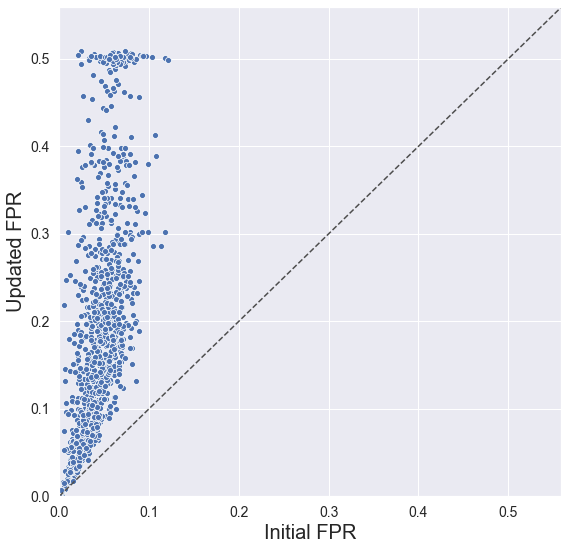

In [16]:
plot_name = "fpr_scatterplot_{}".format(data_type)
plot_file_name = "{}_{}".format(plot_name, "")
plot_path = os.path.join(results_dir, plot_file_name)

create_file_path(plot_path)
scatterplot(data_sklearn_scatterplot, fprs_sklearn_scatterplot, plot_path)

config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)

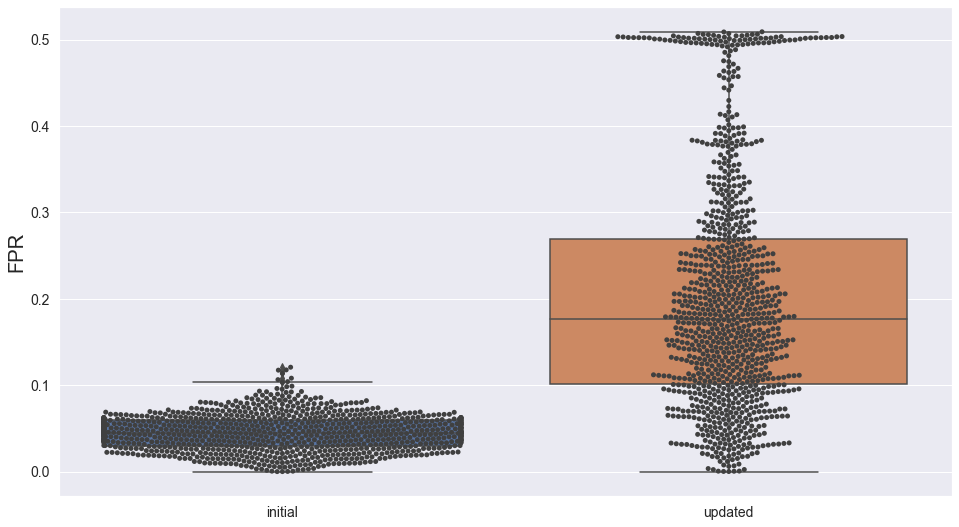

In [17]:
plot_name = "fpr_boxplot_{}".format(data_type)
plot_file_name = "{}_{}".format(plot_name, "")
plot_path = os.path.join(results_dir, plot_file_name)

create_file_path(plot_path)
boxplot(data_sklearn_boxplot, plot_path)

config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)

## Gaussian Data | num_features = 2

In [18]:
m0 = -1
m1 = 1

s0 = 1
s1 = 1

p0 = 0.5
p1 = 1 - p0

In [19]:
seeds = 1000

n_train = 10000
n_update = 10000
n_test = 10000

num_features = 2
num_updates = 100

data_fn = generate_gaussian_dataset(m0, m1, s0, s1, p0, p1)
data_type = "gaussian"

In [20]:
initial_fprs_gaussian, updated_fprs_gaussian = train_update_loop(n_train, n_update, n_test, num_features, num_updates, data_fn, seeds)

In [21]:
fprs_gaussian_boxplot = {"type": (["initial"] * len(initial_fprs_gaussian)) + (["updated"] * len(updated_fprs_gaussian)),
        "fpr": initial_fprs_gaussian + updated_fprs_gaussian}
fprs_gaussian_scatterplot = {"initial_fpr": initial_fprs_gaussian, "updated_fpr": updated_fprs_gaussian}

In [22]:
data_gaussian_boxplot = pd.DataFrame(fprs_gaussian_boxplot)
data_gaussian_scatterplot = pd.DataFrame(fprs_gaussian_scatterplot)

In [23]:
config = {"seeds": seeds, "n_train": n_train, "n_update": n_update, "n_test": n_test, "num_features": num_features, 
          "num_updates": num_updates, "data_type": data_type, "m0": m0, "m1": m1, "s0": s0, "s1": s1, "p0": p0, "p1": p1}

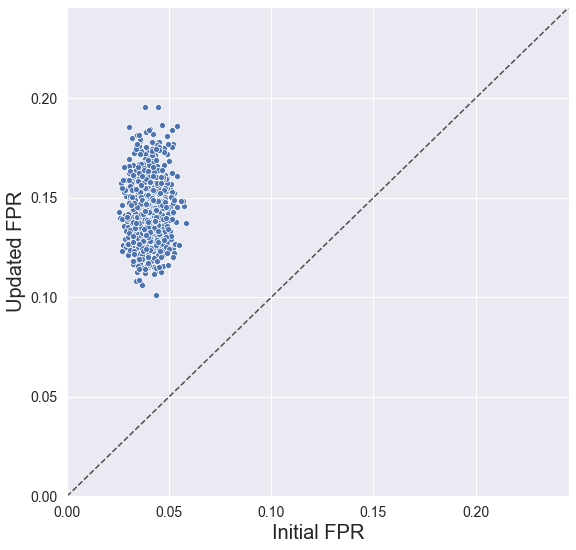

In [24]:
plot_name = "fpr_scatterplot_{}".format(data_type)
plot_file_name = "{}_{}".format(plot_name, "")
plot_path = os.path.join(results_dir, plot_file_name)

create_file_path(plot_path)
scatterplot(data_gaussian_scatterplot, fprs_gaussian_scatterplot, plot_path)

config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)

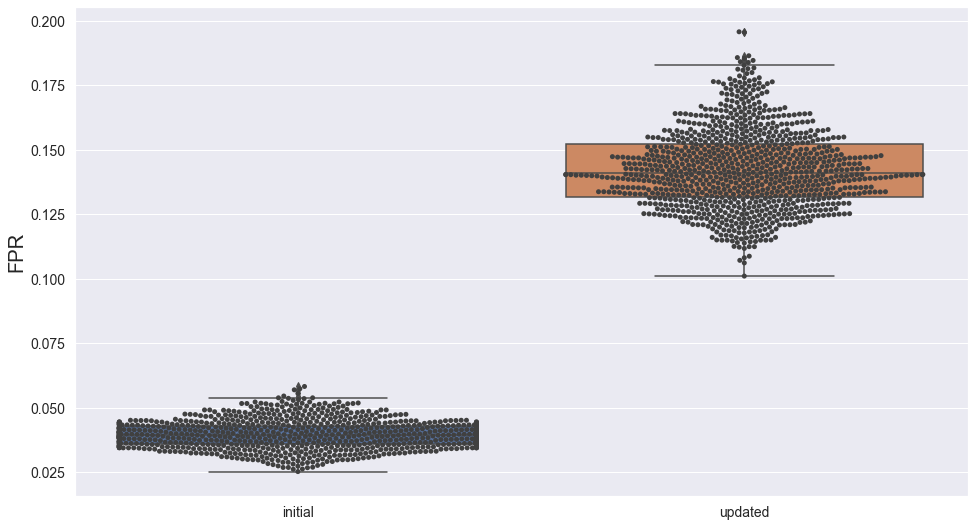

In [25]:
plot_name = "fpr_boxplot_{}".format(data_type)
plot_file_name = "{}_{}".format(plot_name, "")
plot_path = os.path.join(results_dir, plot_file_name)

create_file_path(plot_path)
boxplot(data_gaussian_boxplot, plot_path)

config_file_name = CONFIG_FILE.format(plot_name, "")
config_path = os.path.join(results_dir, config_file_name)
save_json(config, config_path)